In [194]:
import geopandas as gpd
import pandas as pd
from unidecode import unidecode
import matplotlib.pyplot as plt
import contextily as ctx

In [195]:
df_properties = pd.read_csv("Properties.csv", sep=';')
df_properties

,property_url,broker,district,price,type,city,state,ref,category,area,lat,long,num_bedroom,num_bathroom,num_garage,added_date,sold_date
0,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Zona 08,Consulte-nos,Padrão,Maringa,PR,5363.0000,Apartamento,"55,34 m²",-23.446941,-51.919694,2,1,-,2025-04-15,NaN
1,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Zona 01,"R$ 90.000,00",Padrão,Maringá,PR,31223.0000,Apartamento,"48,40 m²",-23.421000,-51.933056,1,1,-,2025-04-15,NaN
2,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Zona 01,"R$ 126.312,10",Padrão,Maringá,PR,35423.0000,Apartamento,"66,36 m²",-23.421000,-51.933056,1,1,-,2025-04-15,NaN
3,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Jardim Barcelona,"R$ 135.000,00",Padrão,Maringá,PR,82763.0000,Terreno,"300,00 m²",-23.459239,-51.981950,-,-,-,2025-04-15,NaN
4,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Jardim Novo Paulista,"R$ 140.000,00",Padrão,Maringá,PR,48803.0000,Terreno,"200,00 m²",-23.408781,-51.865269,-,-,-,2025-04-15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,https://www.leloimoveis.com.br/imovel/casa-res...,Lelo Imóveis,Jardim Alvorada,"R$ 1.360.000,00",NaN,Maringa,PR,79900.8357,Casa,"368,00m²",-23.402900,-51.928218,3,NaN,3,2025-04-26,NaN
1648,https://www.leloimoveis.com.br/imovel/sobrado-...,Lelo Imóveis,Parque Tuiuti,"R$ 630.000,00",NaN,Maringa,PR,79900.8084,Sobrado,"156,00m²",-23.402937,-51.891958,3,NaN,3,2025-04-26,NaN
1649,https://www.silvioiwata.com.br/imovel/36200059...,Silvio Iwata,NaN,"R$ 415.000,00",NaN,Maringá,PR,NaN,Casa,"85,00 m²",-23.398735,-51.961239,3.0,2,2,2025-04-26,NaN
1650,https://www.silvioiwata.com.br/imovel/36200059...,Silvio Iwata,NaN,"R$ 600.000,00",NaN,Maringá,PR,NaN,Casa,"183,00 m²",-23.406334,-51.891547,3.0,3,5,2025-04-26,NaN


In [196]:
df_properties['city'] = df_properties['city'].apply(unidecode)
df_properties['city'] = df_properties['city'].str.title()
df_properties['city'].unique()

array(['Maringa', 'Engenheiro Beltrao', 'Floresta', 'Iretama', 'Marialva',
       'Mandaguari', 'Presidente Castelo Branco', 'Mandaguacu',
       'Paranavai', 'Iguaracu', 'Sarandi', 'Porto Rico', 'Ivatuba',
       'Sao Pedro Do Parana', 'Londrina', 'Paicandu', 'Ourizona',
       'Itapema', 'Itajai', 'Itaguaje', 'Santa Ines',
       'Balneario Camboriu', 'Moreira Sales', 'Santa Fe',
       'Cruzeiro Do Oeste'], dtype=object)

In [197]:
df_properties = df_properties[df_properties['city'] == 'Maringa'].reset_index(drop=True)
df_properties

,property_url,broker,district,price,type,city,state,ref,category,area,lat,long,num_bedroom,num_bathroom,num_garage,added_date,sold_date
0,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Zona 08,Consulte-nos,Padrão,Maringa,PR,5363.0000,Apartamento,"55,34 m²",-23.446941,-51.919694,2,1,-,2025-04-15,NaN
1,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Zona 01,"R$ 90.000,00",Padrão,Maringa,PR,31223.0000,Apartamento,"48,40 m²",-23.421000,-51.933056,1,1,-,2025-04-15,NaN
2,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Zona 01,"R$ 126.312,10",Padrão,Maringa,PR,35423.0000,Apartamento,"66,36 m²",-23.421000,-51.933056,1,1,-,2025-04-15,NaN
3,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Jardim Barcelona,"R$ 135.000,00",Padrão,Maringa,PR,82763.0000,Terreno,"300,00 m²",-23.459239,-51.981950,-,-,-,2025-04-15,NaN
4,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Jardim Novo Paulista,"R$ 140.000,00",Padrão,Maringa,PR,48803.0000,Terreno,"200,00 m²",-23.408781,-51.865269,-,-,-,2025-04-15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,https://www.leloimoveis.com.br/imovel/casa-res...,Lelo Imóveis,Jardim Alvorada,"R$ 1.360.000,00",NaN,Maringa,PR,79900.8357,Casa,"368,00m²",-23.402900,-51.928218,3,NaN,3,2025-04-26,NaN
1576,https://www.leloimoveis.com.br/imovel/sobrado-...,Lelo Imóveis,Parque Tuiuti,"R$ 630.000,00",NaN,Maringa,PR,79900.8084,Sobrado,"156,00m²",-23.402937,-51.891958,3,NaN,3,2025-04-26,NaN
1577,https://www.silvioiwata.com.br/imovel/36200059...,Silvio Iwata,NaN,"R$ 415.000,00",NaN,Maringa,PR,NaN,Casa,"85,00 m²",-23.398735,-51.961239,3.0,2,2,2025-04-26,NaN
1578,https://www.silvioiwata.com.br/imovel/36200059...,Silvio Iwata,NaN,"R$ 600.000,00",NaN,Maringa,PR,NaN,Casa,"183,00 m²",-23.406334,-51.891547,3.0,3,5,2025-04-26,NaN


In [198]:
df_properties = df_properties[df_properties['price'].str.contains('R\$')].reset_index(drop=True)
df_properties

,property_url,broker,district,price,type,city,state,ref,category,area,lat,long,num_bedroom,num_bathroom,num_garage,added_date,sold_date
0,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Zona 01,"R$ 90.000,00",Padrão,Maringa,PR,31223.0000,Apartamento,"48,40 m²",-23.421000,-51.933056,1,1,-,2025-04-15,NaN
1,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Zona 01,"R$ 126.312,10",Padrão,Maringa,PR,35423.0000,Apartamento,"66,36 m²",-23.421000,-51.933056,1,1,-,2025-04-15,NaN
2,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Jardim Barcelona,"R$ 135.000,00",Padrão,Maringa,PR,82763.0000,Terreno,"300,00 m²",-23.459239,-51.981950,-,-,-,2025-04-15,NaN
3,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Jardim Novo Paulista,"R$ 140.000,00",Padrão,Maringa,PR,48803.0000,Terreno,"200,00 m²",-23.408781,-51.865269,-,-,-,2025-04-15,NaN
4,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Jardim Guairacá,"R$ 140.000,00",Padrão,Maringa,PR,70253.0000,Apartamento,"37,26 m²",-23.385413,-51.972162,2,1,-,2025-04-15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,https://www.leloimoveis.com.br/imovel/casa-res...,Lelo Imóveis,Jardim Alvorada,"R$ 1.360.000,00",NaN,Maringa,PR,79900.8357,Casa,"368,00m²",-23.402900,-51.928218,3,NaN,3,2025-04-26,NaN
1570,https://www.leloimoveis.com.br/imovel/sobrado-...,Lelo Imóveis,Parque Tuiuti,"R$ 630.000,00",NaN,Maringa,PR,79900.8084,Sobrado,"156,00m²",-23.402937,-51.891958,3,NaN,3,2025-04-26,NaN
1571,https://www.silvioiwata.com.br/imovel/36200059...,Silvio Iwata,NaN,"R$ 415.000,00",NaN,Maringa,PR,NaN,Casa,"85,00 m²",-23.398735,-51.961239,3.0,2,2,2025-04-26,NaN
1572,https://www.silvioiwata.com.br/imovel/36200059...,Silvio Iwata,NaN,"R$ 600.000,00",NaN,Maringa,PR,NaN,Casa,"183,00 m²",-23.406334,-51.891547,3.0,3,5,2025-04-26,NaN


In [199]:
df_properties.isnull().sum()

property_url       0
broker             0
district         277
price              0
type            1010
city               0
state              0
ref              501
category           0
area               8
lat               11
long              11
num_bedroom      186
num_bathroom     625
num_garage       275
added_date         0
sold_date       1574
dtype: int64

In [200]:
df_properties.dropna(subset=['lat', 'long'], inplace=True)
df_properties

,property_url,broker,district,price,type,city,state,ref,category,area,lat,long,num_bedroom,num_bathroom,num_garage,added_date,sold_date
0,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Zona 01,"R$ 90.000,00",Padrão,Maringa,PR,31223.0000,Apartamento,"48,40 m²",-23.421000,-51.933056,1,1,-,2025-04-15,NaN
1,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Zona 01,"R$ 126.312,10",Padrão,Maringa,PR,35423.0000,Apartamento,"66,36 m²",-23.421000,-51.933056,1,1,-,2025-04-15,NaN
2,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Jardim Barcelona,"R$ 135.000,00",Padrão,Maringa,PR,82763.0000,Terreno,"300,00 m²",-23.459239,-51.981950,-,-,-,2025-04-15,NaN
3,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Jardim Novo Paulista,"R$ 140.000,00",Padrão,Maringa,PR,48803.0000,Terreno,"200,00 m²",-23.408781,-51.865269,-,-,-,2025-04-15,NaN
4,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Jardim Guairacá,"R$ 140.000,00",Padrão,Maringa,PR,70253.0000,Apartamento,"37,26 m²",-23.385413,-51.972162,2,1,-,2025-04-15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,https://www.leloimoveis.com.br/imovel/casa-res...,Lelo Imóveis,Jardim Alvorada,"R$ 1.360.000,00",NaN,Maringa,PR,79900.8357,Casa,"368,00m²",-23.402900,-51.928218,3,NaN,3,2025-04-26,NaN
1570,https://www.leloimoveis.com.br/imovel/sobrado-...,Lelo Imóveis,Parque Tuiuti,"R$ 630.000,00",NaN,Maringa,PR,79900.8084,Sobrado,"156,00m²",-23.402937,-51.891958,3,NaN,3,2025-04-26,NaN
1571,https://www.silvioiwata.com.br/imovel/36200059...,Silvio Iwata,NaN,"R$ 415.000,00",NaN,Maringa,PR,NaN,Casa,"85,00 m²",-23.398735,-51.961239,3.0,2,2,2025-04-26,NaN
1572,https://www.silvioiwata.com.br/imovel/36200059...,Silvio Iwata,NaN,"R$ 600.000,00",NaN,Maringa,PR,NaN,Casa,"183,00 m²",-23.406334,-51.891547,3.0,3,5,2025-04-26,NaN


In [201]:
df_properties['price'] = df_properties['price'].str.replace('R\$', '', regex=True).replace('\.', '', regex=True).replace('\,', '.', regex=True)
df_properties

,property_url,broker,district,price,type,city,state,ref,category,area,lat,long,num_bedroom,num_bathroom,num_garage,added_date,sold_date
0,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Zona 01,90000.00,Padrão,Maringa,PR,31223.0000,Apartamento,"48,40 m²",-23.421000,-51.933056,1,1,-,2025-04-15,NaN
1,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Zona 01,126312.10,Padrão,Maringa,PR,35423.0000,Apartamento,"66,36 m²",-23.421000,-51.933056,1,1,-,2025-04-15,NaN
2,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Jardim Barcelona,135000.00,Padrão,Maringa,PR,82763.0000,Terreno,"300,00 m²",-23.459239,-51.981950,-,-,-,2025-04-15,NaN
3,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Jardim Novo Paulista,140000.00,Padrão,Maringa,PR,48803.0000,Terreno,"200,00 m²",-23.408781,-51.865269,-,-,-,2025-04-15,NaN
4,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Jardim Guairacá,140000.00,Padrão,Maringa,PR,70253.0000,Apartamento,"37,26 m²",-23.385413,-51.972162,2,1,-,2025-04-15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,https://www.leloimoveis.com.br/imovel/casa-res...,Lelo Imóveis,Jardim Alvorada,1360000.00,NaN,Maringa,PR,79900.8357,Casa,"368,00m²",-23.402900,-51.928218,3,NaN,3,2025-04-26,NaN
1570,https://www.leloimoveis.com.br/imovel/sobrado-...,Lelo Imóveis,Parque Tuiuti,630000.00,NaN,Maringa,PR,79900.8084,Sobrado,"156,00m²",-23.402937,-51.891958,3,NaN,3,2025-04-26,NaN
1571,https://www.silvioiwata.com.br/imovel/36200059...,Silvio Iwata,NaN,415000.00,NaN,Maringa,PR,NaN,Casa,"85,00 m²",-23.398735,-51.961239,3.0,2,2,2025-04-26,NaN
1572,https://www.silvioiwata.com.br/imovel/36200059...,Silvio Iwata,NaN,600000.00,NaN,Maringa,PR,NaN,Casa,"183,00 m²",-23.406334,-51.891547,3.0,3,5,2025-04-26,NaN


In [202]:
df_properties = df_properties[~df_properties['price'].str.contains('[a-zA-Z]', na=False)]
df_properties.reset_index(drop=True, inplace=True)
df_properties

,property_url,broker,district,price,type,city,state,ref,category,area,lat,long,num_bedroom,num_bathroom,num_garage,added_date,sold_date
0,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Zona 01,90000.00,Padrão,Maringa,PR,31223.0000,Apartamento,"48,40 m²",-23.421000,-51.933056,1,1,-,2025-04-15,NaN
1,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Zona 01,126312.10,Padrão,Maringa,PR,35423.0000,Apartamento,"66,36 m²",-23.421000,-51.933056,1,1,-,2025-04-15,NaN
2,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Jardim Barcelona,135000.00,Padrão,Maringa,PR,82763.0000,Terreno,"300,00 m²",-23.459239,-51.981950,-,-,-,2025-04-15,NaN
3,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Jardim Novo Paulista,140000.00,Padrão,Maringa,PR,48803.0000,Terreno,"200,00 m²",-23.408781,-51.865269,-,-,-,2025-04-15,NaN
4,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Jardim Guairacá,140000.00,Padrão,Maringa,PR,70253.0000,Apartamento,"37,26 m²",-23.385413,-51.972162,2,1,-,2025-04-15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,https://www.leloimoveis.com.br/imovel/casa-res...,Lelo Imóveis,Jardim Alvorada,1360000.00,NaN,Maringa,PR,79900.8357,Casa,"368,00m²",-23.402900,-51.928218,3,NaN,3,2025-04-26,NaN
1537,https://www.leloimoveis.com.br/imovel/sobrado-...,Lelo Imóveis,Parque Tuiuti,630000.00,NaN,Maringa,PR,79900.8084,Sobrado,"156,00m²",-23.402937,-51.891958,3,NaN,3,2025-04-26,NaN
1538,https://www.silvioiwata.com.br/imovel/36200059...,Silvio Iwata,NaN,415000.00,NaN,Maringa,PR,NaN,Casa,"85,00 m²",-23.398735,-51.961239,3.0,2,2,2025-04-26,NaN
1539,https://www.silvioiwata.com.br/imovel/36200059...,Silvio Iwata,NaN,600000.00,NaN,Maringa,PR,NaN,Casa,"183,00 m²",-23.406334,-51.891547,3.0,3,5,2025-04-26,NaN


In [203]:
df_properties['price'] = df_properties['price'].str.replace(r'[^a-zA-Z0-9\s.]', '', regex=True)
df_properties

C:\Users\joaov\AppData\Local\Temp\ipykernel_3900\2944560360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_properties['price'] = df_properties['price'].str.replace(r'[^a-zA-Z0-9\s.]', '', regex=True)


,property_url,broker,district,price,type,city,state,ref,category,area,lat,long,num_bedroom,num_bathroom,num_garage,added_date,sold_date
0,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Zona 01,90000.00,Padrão,Maringa,PR,31223.0000,Apartamento,"48,40 m²",-23.421000,-51.933056,1,1,-,2025-04-15,NaN
1,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Zona 01,126312.10,Padrão,Maringa,PR,35423.0000,Apartamento,"66,36 m²",-23.421000,-51.933056,1,1,-,2025-04-15,NaN
2,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Jardim Barcelona,135000.00,Padrão,Maringa,PR,82763.0000,Terreno,"300,00 m²",-23.459239,-51.981950,-,-,-,2025-04-15,NaN
3,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Jardim Novo Paulista,140000.00,Padrão,Maringa,PR,48803.0000,Terreno,"200,00 m²",-23.408781,-51.865269,-,-,-,2025-04-15,NaN
4,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Jardim Guairacá,140000.00,Padrão,Maringa,PR,70253.0000,Apartamento,"37,26 m²",-23.385413,-51.972162,2,1,-,2025-04-15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,https://www.leloimoveis.com.br/imovel/casa-res...,Lelo Imóveis,Jardim Alvorada,1360000.00,NaN,Maringa,PR,79900.8357,Casa,"368,00m²",-23.402900,-51.928218,3,NaN,3,2025-04-26,NaN
1537,https://www.leloimoveis.com.br/imovel/sobrado-...,Lelo Imóveis,Parque Tuiuti,630000.00,NaN,Maringa,PR,79900.8084,Sobrado,"156,00m²",-23.402937,-51.891958,3,NaN,3,2025-04-26,NaN
1538,https://www.silvioiwata.com.br/imovel/36200059...,Silvio Iwata,NaN,415000.00,NaN,Maringa,PR,NaN,Casa,"85,00 m²",-23.398735,-51.961239,3.0,2,2,2025-04-26,NaN
1539,https://www.silvioiwata.com.br/imovel/36200059...,Silvio Iwata,NaN,600000.00,NaN,Maringa,PR,NaN,Casa,"183,00 m²",-23.406334,-51.891547,3.0,3,5,2025-04-26,NaN


In [204]:
df_properties['price'] = df_properties['price'].astype(float)
df_properties

C:\Users\joaov\AppData\Local\Temp\ipykernel_3900\2110883589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_properties['price'] = df_properties['price'].astype(float)


,property_url,broker,district,price,type,city,state,ref,category,area,lat,long,num_bedroom,num_bathroom,num_garage,added_date,sold_date
0,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Zona 01,90000.0,Padrão,Maringa,PR,31223.0000,Apartamento,"48,40 m²",-23.421000,-51.933056,1,1,-,2025-04-15,NaN
1,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Zona 01,126312.1,Padrão,Maringa,PR,35423.0000,Apartamento,"66,36 m²",-23.421000,-51.933056,1,1,-,2025-04-15,NaN
2,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Jardim Barcelona,135000.0,Padrão,Maringa,PR,82763.0000,Terreno,"300,00 m²",-23.459239,-51.981950,-,-,-,2025-04-15,NaN
3,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Jardim Novo Paulista,140000.0,Padrão,Maringa,PR,48803.0000,Terreno,"200,00 m²",-23.408781,-51.865269,-,-,-,2025-04-15,NaN
4,https://www.pedrogranado.com.br/comprar/maring...,Pedro Granado Imóveis,Jardim Guairacá,140000.0,Padrão,Maringa,PR,70253.0000,Apartamento,"37,26 m²",-23.385413,-51.972162,2,1,-,2025-04-15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,https://www.leloimoveis.com.br/imovel/casa-res...,Lelo Imóveis,Jardim Alvorada,1360000.0,NaN,Maringa,PR,79900.8357,Casa,"368,00m²",-23.402900,-51.928218,3,NaN,3,2025-04-26,NaN
1537,https://www.leloimoveis.com.br/imovel/sobrado-...,Lelo Imóveis,Parque Tuiuti,630000.0,NaN,Maringa,PR,79900.8084,Sobrado,"156,00m²",-23.402937,-51.891958,3,NaN,3,2025-04-26,NaN
1538,https://www.silvioiwata.com.br/imovel/36200059...,Silvio Iwata,NaN,415000.0,NaN,Maringa,PR,NaN,Casa,"85,00 m²",-23.398735,-51.961239,3.0,2,2,2025-04-26,NaN
1539,https://www.silvioiwata.com.br/imovel/36200059...,Silvio Iwata,NaN,600000.0,NaN,Maringa,PR,NaN,Casa,"183,00 m²",-23.406334,-51.891547,3.0,3,5,2025-04-26,NaN


In [205]:
df_resumed = df_properties[['price', 'lat', 'long']]
df_resumed

,price,lat,long
0,90000.0,-23.421000,-51.933056
1,126312.1,-23.421000,-51.933056
2,135000.0,-23.459239,-51.981950
3,140000.0,-23.408781,-51.865269
4,140000.0,-23.385413,-51.972162
...,...,...,...
1536,1360000.0,-23.402900,-51.928218
1537,630000.0,-23.402937,-51.891958
1538,415000.0,-23.398735,-51.961239
1539,600000.0,-23.406334,-51.891547


In [206]:
df_prop = gpd.GeoDataFrame(
    df_resumed, geometry=gpd.points_from_xy(df_resumed.long, df_resumed.lat), crs="EPSG:4326"
)

df_prop

,price,lat,long,geometry
0,90000.0,-23.421000,-51.933056,POINT (-51.93306 -23.421)
1,126312.1,-23.421000,-51.933056,POINT (-51.93306 -23.421)
2,135000.0,-23.459239,-51.981950,POINT (-51.98195 -23.45924)
3,140000.0,-23.408781,-51.865269,POINT (-51.86527 -23.40878)
4,140000.0,-23.385413,-51.972162,POINT (-51.97216 -23.38541)
...,...,...,...,...
1536,1360000.0,-23.402900,-51.928218,POINT (-51.92822 -23.4029)
1537,630000.0,-23.402937,-51.891958,POINT (-51.89196 -23.40294)
1538,415000.0,-23.398735,-51.961239,POINT (-51.96124 -23.39874)
1539,600000.0,-23.406334,-51.891547,POINT (-51.89155 -23.40633)


In [207]:
shape = gpd.read_file('PR_Municipios_2023\\PR_Municipios_2023.shp')
maringa_shape = shape[shape['NM_MUN'] == 'Maringá']
maringa_shape

,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,CD_REGIAO,NM_REGIAO,CD_CONCURB,NM_CONCURB,AREA_KM2,geometry
208,4115200,Maringá,410014,Maringá,4104,Maringá,41,Paraná,4,Sul,4115200,Maringá/PR,487.012,"POLYGON ((-51.89335 -23.30475, -51.89258 -23.3..."


In [208]:
maringa_shape = maringa_shape.to_crs(df_prop.crs)
maringa_shape

,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,CD_REGIAO,NM_REGIAO,CD_CONCURB,NM_CONCURB,AREA_KM2,geometry
208,4115200,Maringá,410014,Maringá,4104,Maringá,41,Paraná,4,Sul,4115200,Maringá/PR,487.012,"POLYGON ((-51.89335 -23.30475, -51.89258 -23.3..."


In [209]:
df_prop = df_prop[df_prop.within(maringa_shape.unary_union)]
df_prop

C:\Users\joaov\AppData\Local\Temp\ipykernel_3900\2934908617.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  df_prop = df_prop[df_prop.within(maringa_shape.unary_union)]


,price,lat,long,geometry
0,90000.0,-23.421000,-51.933056,POINT (-51.93306 -23.421)
1,126312.1,-23.421000,-51.933056,POINT (-51.93306 -23.421)
2,135000.0,-23.459239,-51.981950,POINT (-51.98195 -23.45924)
3,140000.0,-23.408781,-51.865269,POINT (-51.86527 -23.40878)
4,140000.0,-23.385413,-51.972162,POINT (-51.97216 -23.38541)
...,...,...,...,...
1536,1360000.0,-23.402900,-51.928218,POINT (-51.92822 -23.4029)
1537,630000.0,-23.402937,-51.891958,POINT (-51.89196 -23.40294)
1538,415000.0,-23.398735,-51.961239,POINT (-51.96124 -23.39874)
1539,600000.0,-23.406334,-51.891547,POINT (-51.89155 -23.40633)


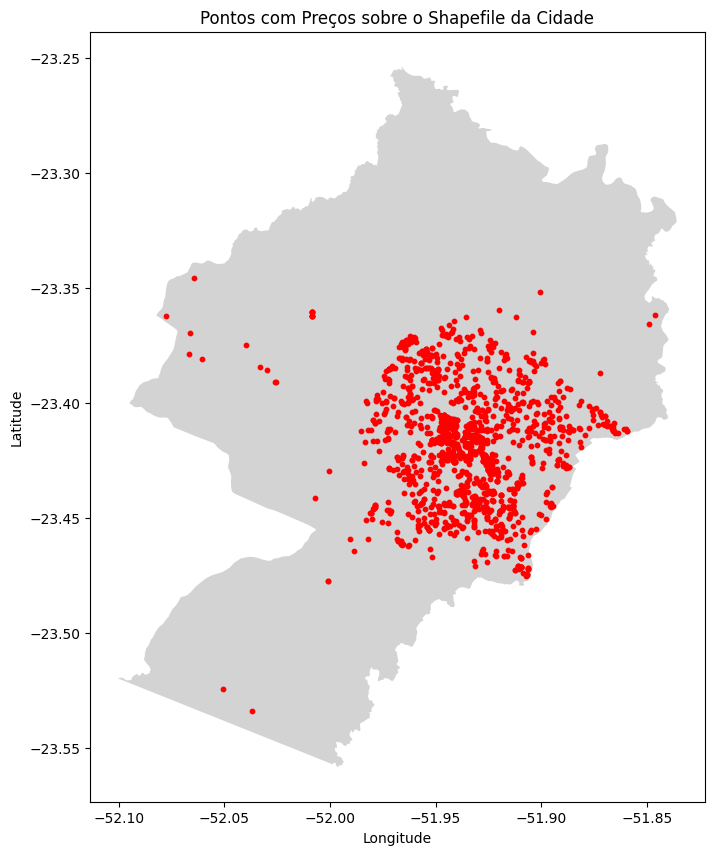

In [210]:
fig, ax = plt.subplots(figsize=(10, 10))
maringa_shape.plot(ax=ax, color='lightgrey')  # Mapa base (shapefile)
df_prop.plot(ax=ax, color='red', markersize=10)  # Pontos do DataFrame
plt.title("Pontos com Preços sobre o Shapefile da Cidade")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [211]:
maringa_shape = maringa_shape.to_crs(epsg=3857)
df_prop = df_prop.to_crs(epsg=3857)

In [216]:
df_prop.explore("price", legend=False)

AttributeError: Stamen

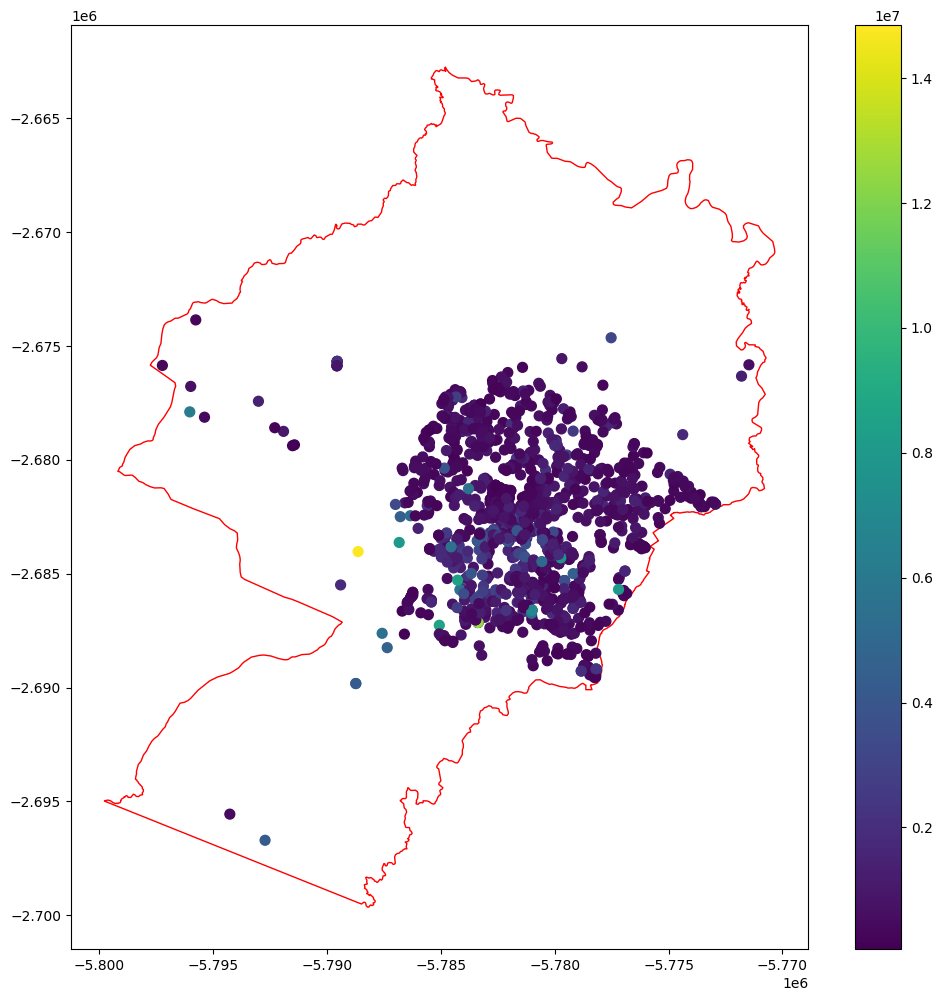

In [213]:
# Plotar o shapefile, pontos e o fundo do Google Maps
fig, ax = plt.subplots(figsize=(12, 12))
maringa_shape.plot(ax=ax, facecolor="none", edgecolor="red", linewidth=1)  # Mapa base (shapefile)
df_prop.plot(ax=ax, column='price', cmap='viridis', legend=True, markersize=50)  # Pontos coloridos com base no preço

# Adicionar o fundo do Google Maps (usando tiles)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)  # Substitua por outro provedor, se necessário

# Exibir o gráfico
plt.title("Pontos Coloridos por Preço com Fundo do Google Maps")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()